In [63]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import pandas as pd 
import pickle
import seaborn as sns
SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [26]:
with open('reg_split_GP(MLP)_cv_results.pickle', 'rb') as file:
    MLP_results = pickle.load(file)
with open('reg_split_TabNet_cv_results.pickle', 'rb') as file:
    TabNet_results = pickle.load(file)
with open('reg_split_ERT_cv_results.pickle', 'rb') as file:
    ERT_results = pickle.load(file)
splits = np.linspace(3, 10, num=50)

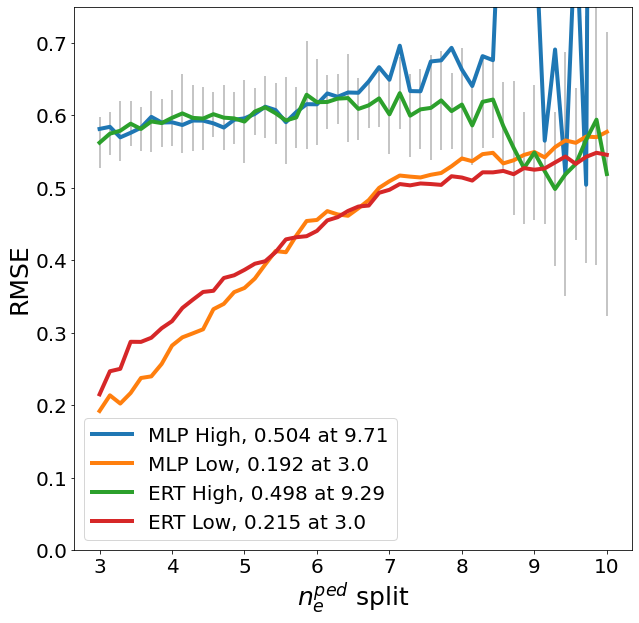

In [60]:
"""
A model type (MLP/ERT/TabNet) is split on low and high subsets of neped, and CV tested on same subset
"""
best_MLP_high = min(MLP_results['HnM_test'])
best_MLP_low = min(MLP_results['LnM_test'])
best_MLP_high_split = splits[np.argwhere(MLP_results['HnM_test'] == best_MLP_high)]
best_MLP_low_split = splits[np.argwhere(MLP_results['LnM_test'] == best_MLP_low)]

best_TabNet_high = min(TabNet_results['HnM_test'])
best_TabNet_low = min(TabNet_results['LnM_test'])
best_TabNet_high_split = splits[np.argwhere(TabNet_results['HnM_test'] == best_TabNet_high)]
best_TabNet_low_split = splits[np.argwhere(TabNet_results['LnM_test'] == best_TabNet_low)]

best_ERT_high = min(ERT_results['HnM_test'])
best_ERT_low = min(ERT_results['LnM_test'])
best_ERT_high_split = splits[np.argwhere(ERT_results['HnM_test'] == best_ERT_high)]
best_ERT_low_split = splits[np.argwhere(ERT_results['LnM_test'] == best_ERT_low)]


fig1 = plt.figure(figsize=(10, 10))
plt.plot(splits, MLP_results['HnM_test'], lw=4,label='MLP High, {:.3} at {:.3}'.format(best_MLP_high, best_MLP_high_split[0][0]))
plt.plot(splits, MLP_results['LnM_test'], lw=4,label='MLP Low, {:.3} at {:.3}'.format(best_MLP_low, best_MLP_low_split[0][0]))
# plt.errorbar(splits, MLP_results['HnM_test'], fmt='none', yerr=MLP_results['HnM_test_std'], alpha=0.6, color='black')
# plt.plot(splits, TabNet_results['HnM_test'], label='TabNet High, {:.3} at {:.3}'.format(best_TabNet_high, best_TabNet_high_split[0][0]))
# plt.plot(splits, TabNet_results['LnM_test'], label='TabNet Low, {:.3} at {:.3}'.format(best_TabNet_low, best_TabNet_low_split[0][0]))
# plt.errorbar(splits, MLP_results['HnM_test'], fmt='none', yerr=MLP_results['HnM_test_std'], alpha=0.6, color='grey')
plt.plot(splits, ERT_results['HnM_test'],lw=4, label='ERT High, {:.3} at {:.3}'.format(best_ERT_high, best_ERT_high_split[0][0]))
plt.plot(splits, ERT_results['LnM_test'],lw=4, label='ERT Low, {:.3} at {:.3}'.format(best_ERT_low, best_ERT_low_split[0][0]))
plt.errorbar(splits, ERT_results['HnM_test'], fmt='none', yerr=ERT_results['HnM_test_std'], alpha=0.6, color='grey')


plt.xlabel('$n_e^{ped}$ split')
plt.ylabel('RMSE')
plt.ylim(0, 0.75)
plt.legend()
plt.show()

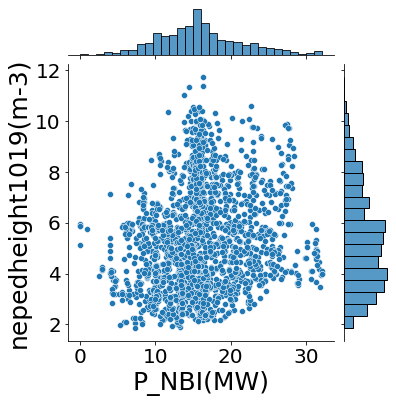

In [85]:
df = pd.read_csv('/home/adam/data/seperatrix_dataset.csv')
df_both = df[['Ip(MA)', 'B(T)', 'a(m)', 'averagetriangularity', 'P_NBI(MW)', 'P_ICRH(MW)','P_TOTPNBIPohmPICRH-Pshi(MW)','plasmavolume(m3)', 'q95', 'gasflowrateofmainspecies1022(es)', 'nepedheight1019(m-3)']]

df_both.describe()

sns.jointplot(data=df_both, x='P_NBI(MW)', y='nepedheight1019(m-3)')

In [74]:

around_8 = df_both[(df_both['nepedheight1019(m-3)'] > 7.9) & (df_both['nepedheight1019(m-3)'] < 8.2)]
around_8.describe()


,Ip(MA),B(T),a(m),averagetriangularity,P_NBI(MW),P_ICRH(MW),P_TOTPNBIPohmPICRH-Pshi(MW),plasmavolume(m3),q95,gasflowrateofmainspecies1022(es),nepedheight1019(m-3)
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.591113,2.696026,0.912687,0.349792,16.709444,1.692406,19.184609,74.283596,3.251646,3.454391,8.055605
std,0.353114,0.174923,0.015225,0.051507,3.447721,1.733844,4.320229,2.033974,0.192453,2.013444,0.090717
min,2.467616,2.502469,0.882640,0.181202,11.490231,0.000000,12.337465,69.962020,2.591864,0.842539,7.906969
25%,2.473890,2.631768,0.908073,0.360707,15.220205,0.000741,16.030448,73.565695,3.141360,2.654814,7.985377
50%,2.477555,2.651945,0.912297,0.372119,15.898128,1.349823,19.085142,73.890900,3.338365,3.025607,8.041010
75%,2.482525,2.668191,0.916387,0.376780,17.806763,2.991124,21.719293,74.723302,3.381935,3.928662,8.130058
max,4.480694,3.567076,0.959051,0.389119,26.955746,5.133460,30.693523,80.708120,3.491397,14.050612,8.199807


In [82]:
around_4 = df_both[(df_both['nepedheight1019(m-3)'] > 3.9) & (df_both['nepedheight1019(m-3)'] < 4.1)]
around_4.describe()

,Ip(MA),B(T),a(m),averagetriangularity,P_NBI(MW),P_ICRH(MW),P_TOTPNBIPohmPICRH-Pshi(MW),plasmavolume(m3),q95,gasflowrateofmainspecies1022(es),nepedheight1019(m-3)
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,1.976017,2.396465,0.927802,0.259067,16.346955,1.524174,18.100843,75.088404,3.765813,1.495708,4.004766
std,0.352218,0.548834,0.017248,0.059218,6.910812,1.763752,7.801892,2.288382,0.549078,1.048939,0.062784
min,1.366477,1.653781,0.880683,0.178588,2.550753,0.000000,3.504335,68.563590,2.943021,0.000000,3.904282
25%,1.682252,1.988316,0.918958,0.216987,11.568968,0.000000,12.910170,74.225250,3.331882,0.803005,3.946832
50%,1.988828,2.307452,0.929584,0.241367,14.726300,1.257535,16.929056,74.713745,3.696336,1.441255,4.010037
75%,2.191721,2.789152,0.941134,0.277671,20.707600,2.517760,22.900826,75.899260,4.080955,1.774423,4.060466
max,2.781388,3.662984,0.964862,0.399155,32.081516,5.775564,35.546722,80.954270,5.201771,5.395292,4.098705


In [ ]:
with open('./anom_detect_SimpleAE_ld20_splitexp_results.pickle', 'rb') as file:
    ae_final_results = pickle.load(file)
    final_losses = pickle.load(file)

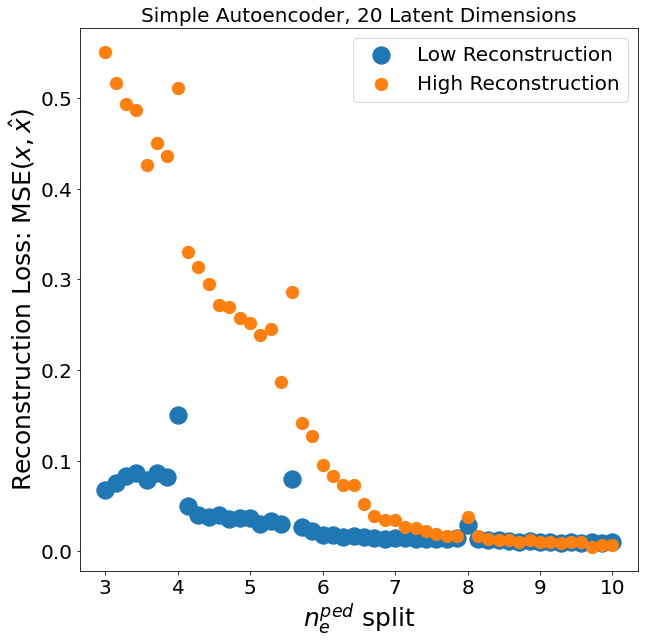

In [89]:
"""
AE is trained on low, and predicts on CV left out low, as well as high. 

The point we are interested in are where the recon loss is much greater for the high than it is for low
"""
fig = plt.figure(figsize=(10,10))

plt.scatter(final_losses['split'], final_losses['low'], s=300, label='Low Reconstruction')
plt.scatter(final_losses['split'], final_losses['high'], s=150, label='High Reconstruction')
plt.xlabel('$n_e^{ped}$ split')
plt.ylabel('Reconstruction Loss: MSE($x, \hat{x}$)')
plt.legend()
plt.title('Simple Autoencoder, 20 Latent Dimensions')
plt.show()



In [90]:
with open('./anom_detect_VanillaVAE_ld20_split5to10_results.pickle', 'rb') as file:
    vae_results = pickle.load(file)
    vae_losses = pickle.load(file)

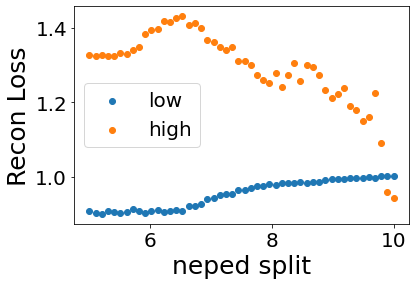

In [91]:
plt.scatter(vae_losses['split'],vae_losses['low'], label='low')
plt.scatter(vae_losses['split'],vae_losses['high'], label='high')
plt.xlabel('neped split')
plt.ylabel('Recon Loss')
plt.legend()

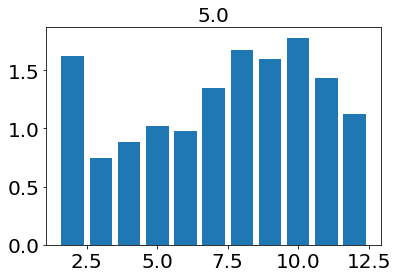

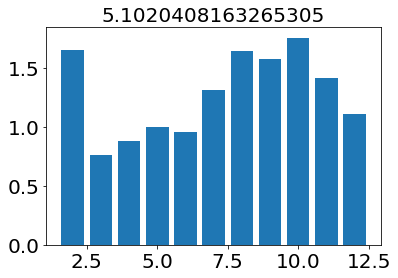

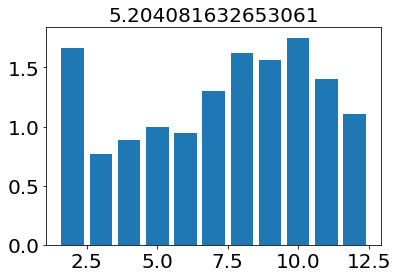

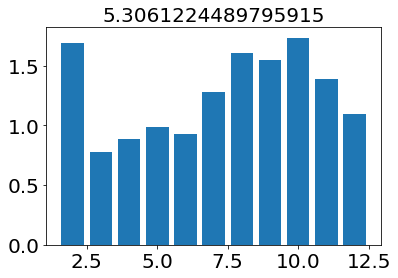

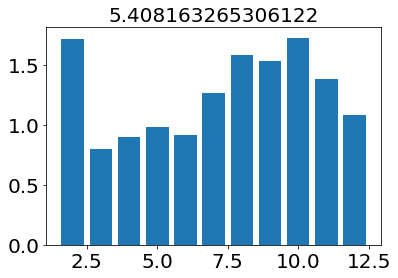

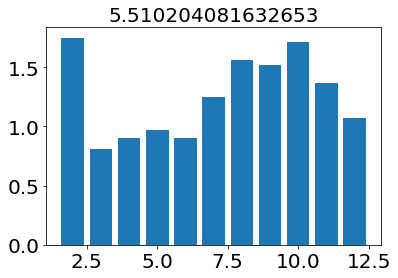

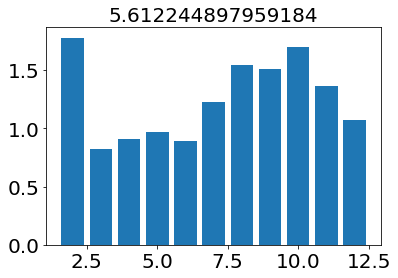

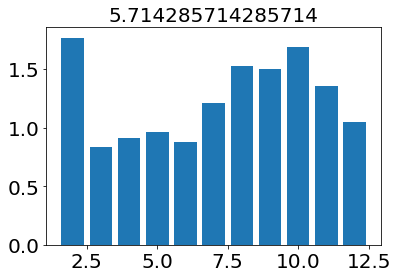

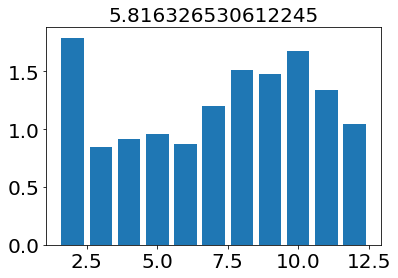

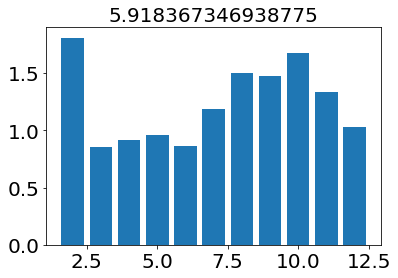

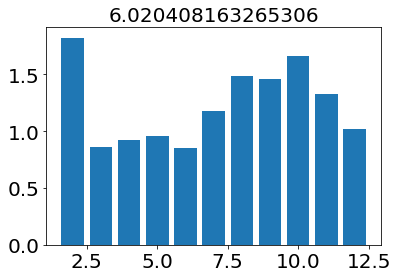

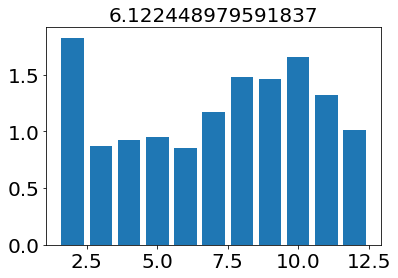

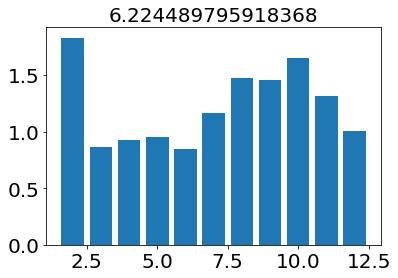

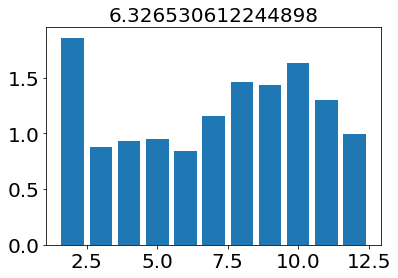

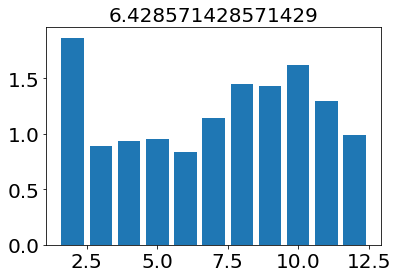

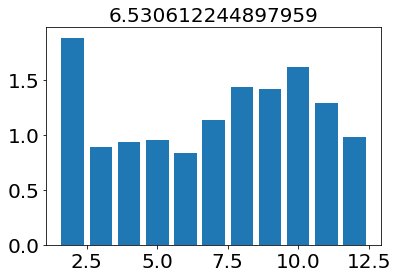

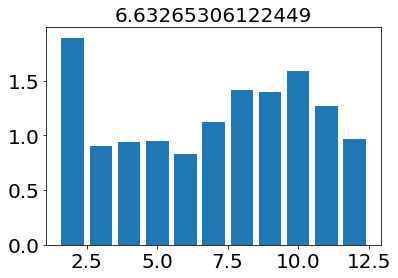

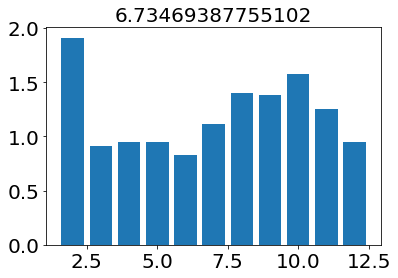

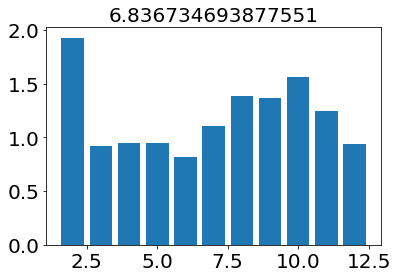

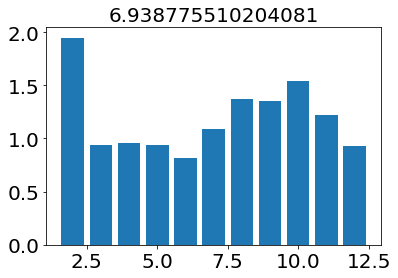

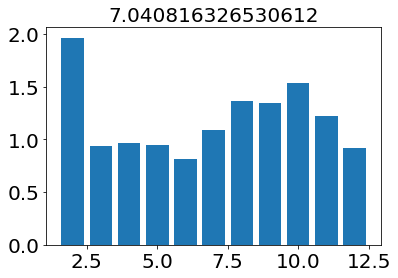

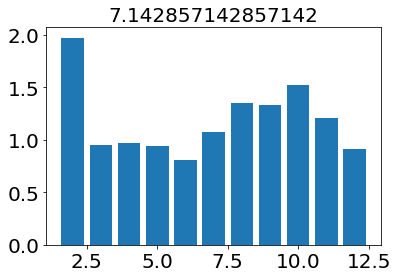

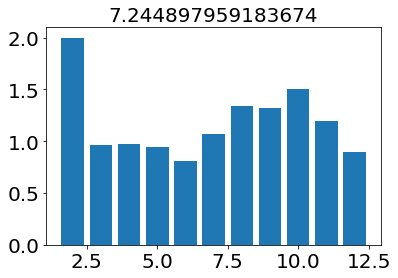

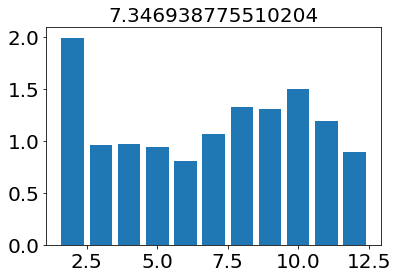

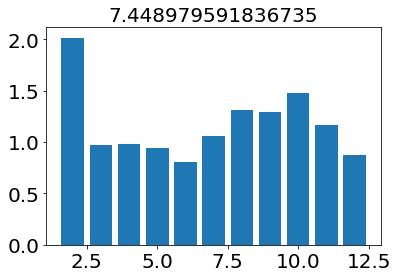

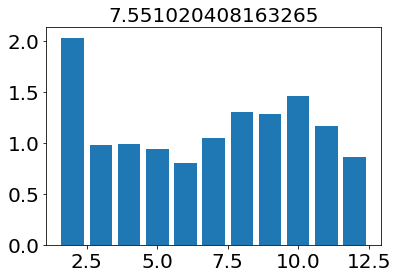

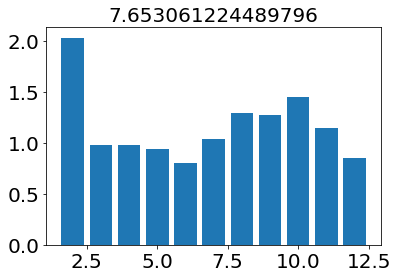

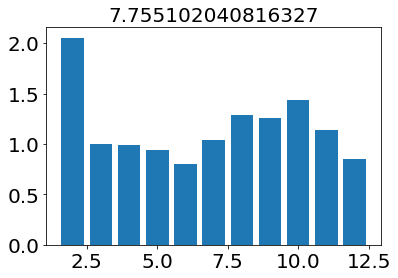

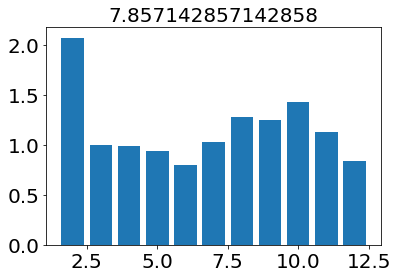

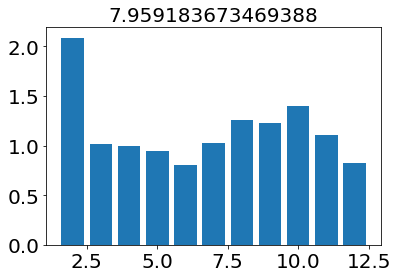

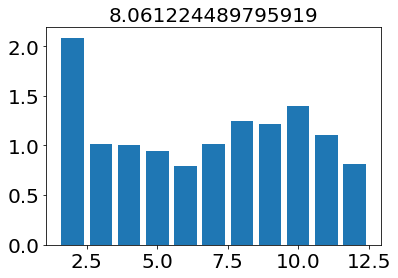

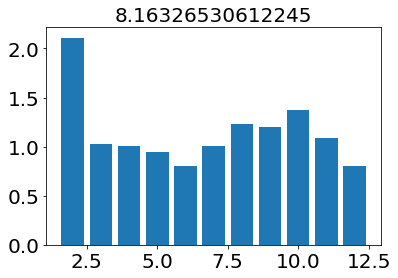

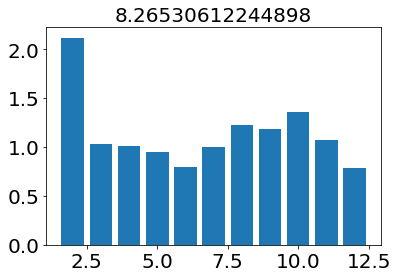

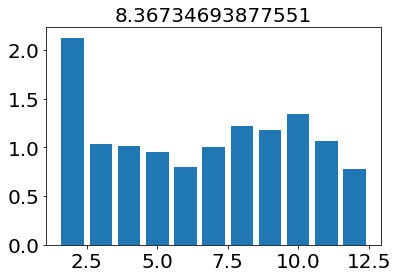

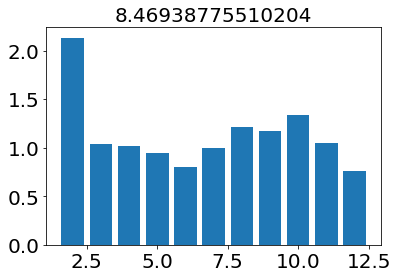

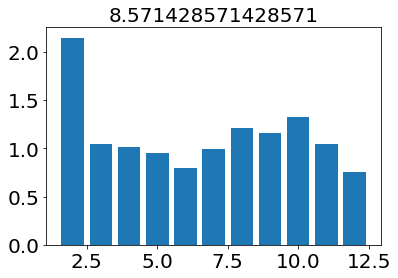

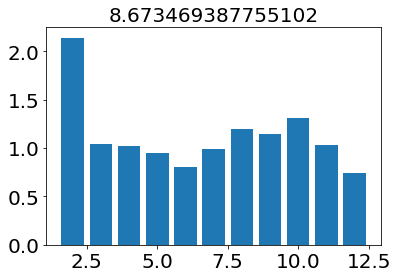

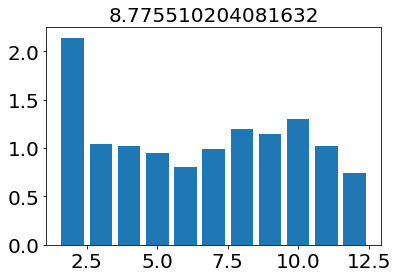

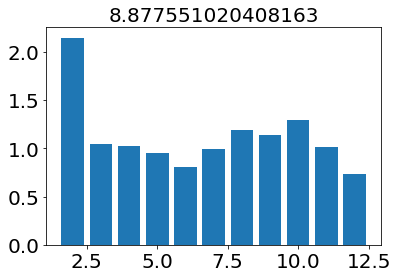

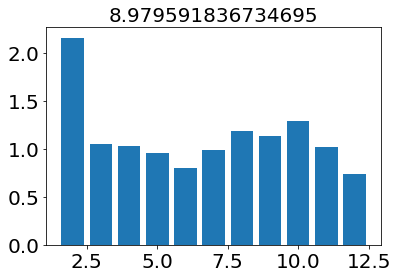

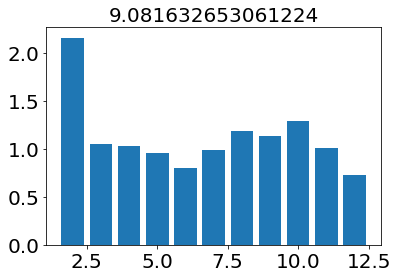

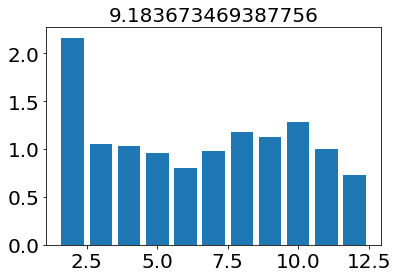

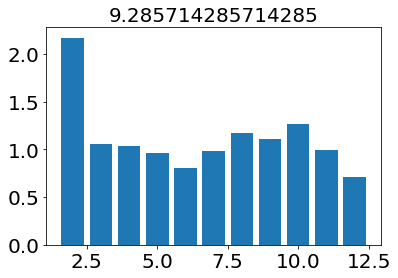

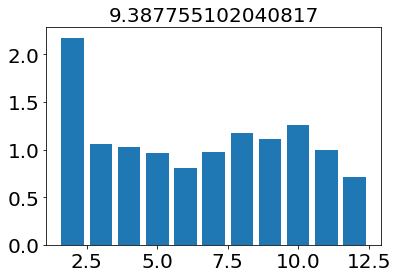

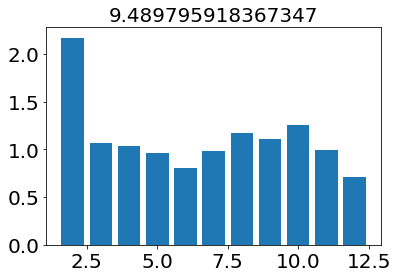

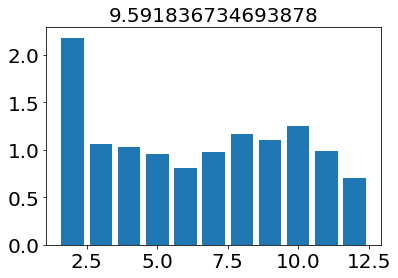

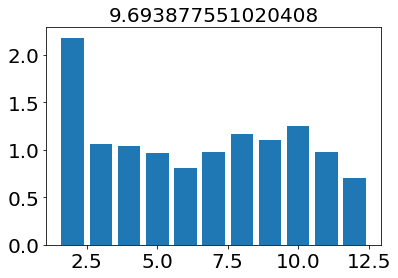

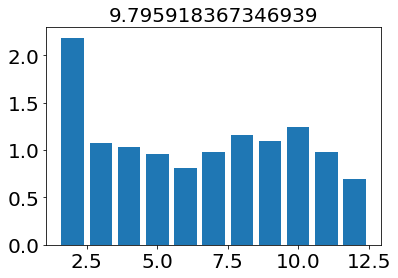

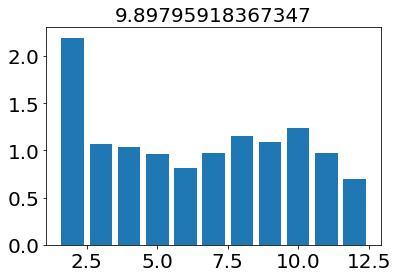

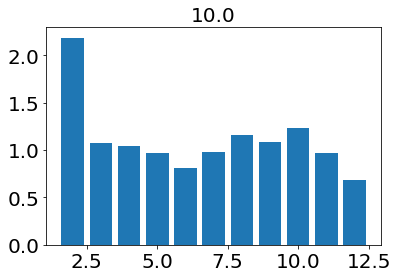

In [102]:
# 6.122448979591837, 8.061224489795919
for j in np.linspace(5, 10, num=50):
    digitized = np.digitize(vae_results[str(j)]['y_val'], np.linspace(1, 12, num=12))
    residual = [np.abs(vae_results[str(j)]['recon'])[digitized ==i].mean() for i in range(1, 12)]
    plt.bar(np.linspace(1, 12, 12)[1:12], residual)
    plt.title(j)
    plt.show()
